# Stoneburner, Kurt
- ## DSC 640 - Week XX

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [2]:
# //*** Legends automatically generate too many labels based on my looping method.
# //*** Remove the Duplicate Legends. I wrote this for DSC 530 and it keeps on giving.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels


In [3]:
raw_df = pd.read_excel("z_wk01_allhlcn20.xlsx")

In [4]:
state_df = raw_df[ (raw_df['Area Type'] == "State") ]
ca_df = state_df[state_df["St Name"]=="California"]
ca_df

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
3353,06000,06,0.0,0,10,2020,A,State,California,California -- Statewide,Total Covered,"10 Total, all industries",NaN,1627484,16376295,1301826279330,1529,79495,1.00,1.00
3354,06000,06,0.0,1,10,2020,A,State,California,California -- Statewide,Federal Government,"10 Total, all industries",NaN,3334,260068,22718907478,1680,87358,0.75,0.62
3355,06000,06,0.0,2,10,2020,A,State,California,California -- Statewide,State Government,"10 Total, all industries",NaN,13637,474295,42584813264,1727,89785,0.88,0.96
3356,06000,06,0.0,3,10,2020,A,State,California,California -- Statewide,Local Government,"10 Total, all industries",NaN,19348,1677176,122885828106,1409,73269,1.04,1.08
3357,06000,06,0.0,5,10,2020,A,State,California,California -- Statewide,Private,"10 Total, all industries",NaN,1591166,13964756,1113636730482,1534,79746,1.01,1.01
3358,06000,06,0.0,5,101,2020,A,State,California,California -- Statewide,Private,101 Goods-producing,NaN,148897,2544673,222672030038,1683,87505,1.03,1.03
3359,06000,06,0.0,5,1011,2020,A,State,California,California -- Statewide,Private,1011 Natural resources and mining,NaN,17731,425665,18110640593,818,42547,2.03,1.14
3360,06000,06,0.0,5,1012,2020,A,State,California,California -- Statewide,Private,1012 Construction,NaN,86778,855713,65687839201,1476,76764,1.01,0.93
3361,06000,06,0.0,5,1013,2020,A,State,California,California -- Statewide,Private,1013 Manufacturing,NaN,44388,1263295,138873550244,2114,109930,0.89,1.07
3362,06000,06,0.0,5,102,2020,A,State,California,California -- Statewide,Private,102 Service-providing,NaN,1442269,11420083,890964700444,1500,78017,1.00,1.00


In [5]:
raw_df[ (raw_df['Area Type']=='Nation') & (raw_df["Industry"]=="10 Total, all industries") ] 

all_cols = ['Area\nCode', 'St', 'Cnty', 'Own', 'NAICS', 'Year', 'Qtr', 'Area Type',
       'St Name', 'Area', 'Ownership', 'Industry',
       'Annual Average Status Code', 'Annual Average Establishment Count',
       'Annual Average Employment', 'Annual Total Wages',
       'Annual Average Weekly Wage', 'Annual Average Pay',
       'Employment Location Quotient Relative to U.S.',
       'Total Wage Location Quotient Relative to U.S.']
nation_cols = ['Area Type','Ownership', 'Industry',
       'Annual Average Establishment Count',
       'Annual Average Employment', 'Annual Total Wages',
       'Annual Average Weekly Wage', 'Annual Average Pay',
       'Employment Location Quotient Relative to U.S.',
       'Total Wage Location Quotient Relative to U.S.']

nation_df = raw_df[nation_cols]
nation_df = nation_df[ (nation_df['Area Type']=='Nation') & (nation_df["Industry"]=="10 Total, all industries") ] 
nation_df = nation_df[nation_df["Ownership"] != "Total Covered"]
nation_df

,Area Type,Ownership,Industry,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
1,Nation,Federal Government,"10 Total, all industries",61310,2927788,250261448866,1644,85478,1.0,1.0
2,Nation,State Government,"10 Total, all industries",70057,4590784,301891443958,1265,65760,1.0,1.0
3,Nation,Local Government,"10 Total, all industries",171046,13643540,776056455733,1094,56881,1.0,1.0
4,Nation,Private,"10 Total, all industries",10192539,117944857,7576501397400,1235,64238,1.0,1.0


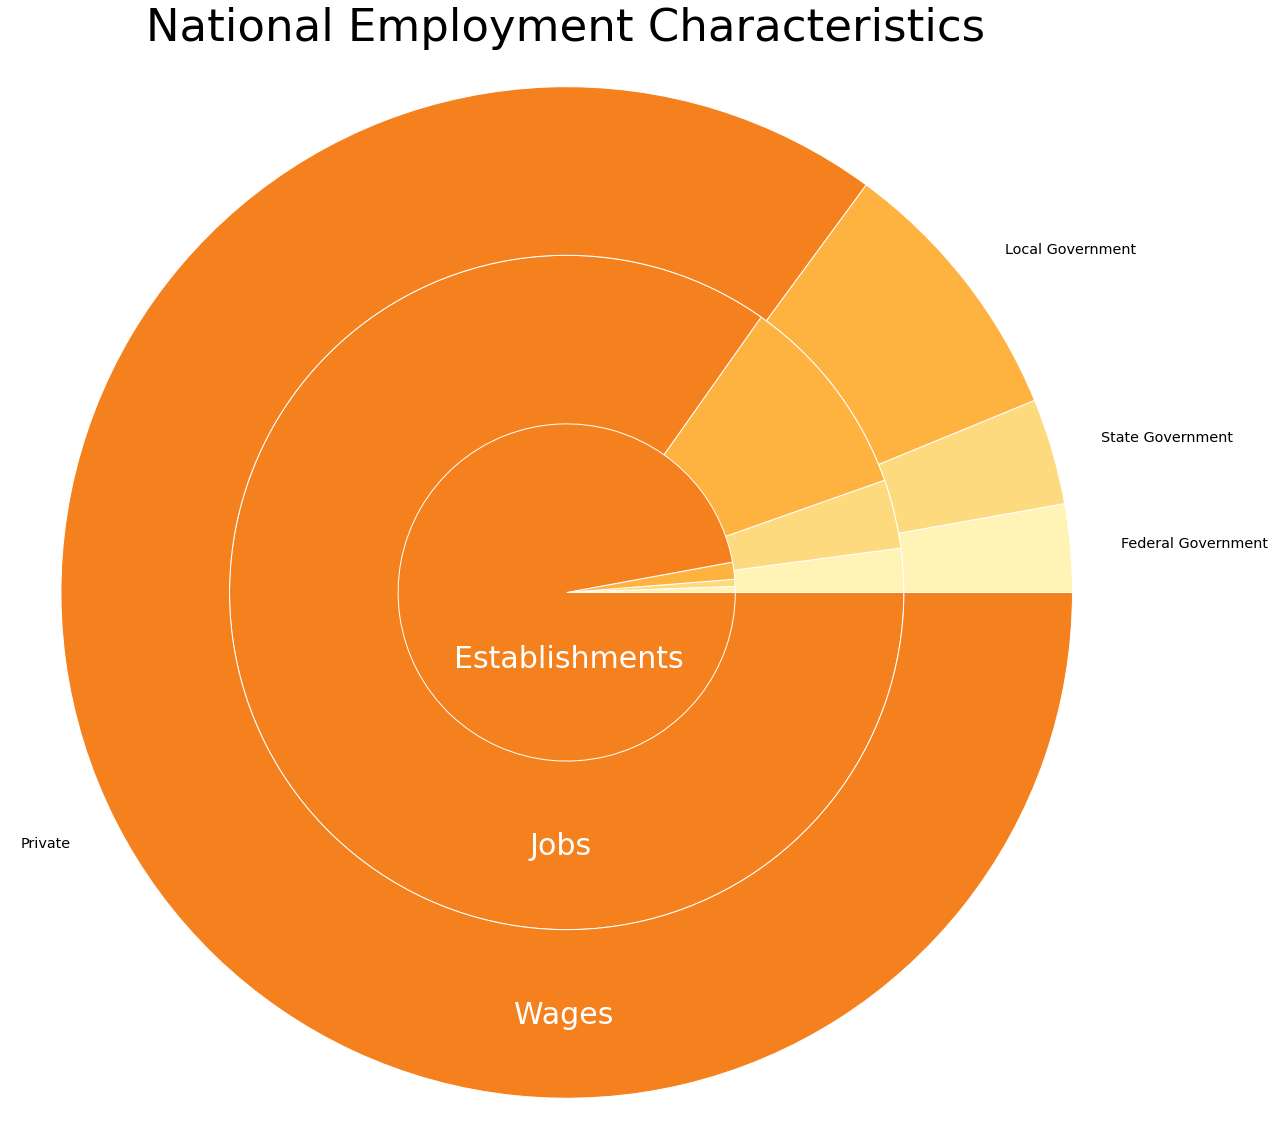

In [6]:
x3 = "Annual Total Wages"
x2 = "Annual Average Employment"
x1 = "Annual Average Establishment Count"
y = "Ownership"


plot_df = nation_df

size =3
scale=1.5
wedge = size
colors = sns.color_palette('YlOrBr')[0:len(plot_df[x1])]
fig1, ax1 = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(20, 20)

ax1.pie(plot_df[x1],
        #labels=plot_df[y], 
        #autopct='%1.1f%%',
        shadow=True,
        colors=colors,
        radius=size,
        wedgeprops=dict(edgecolor='w'),
        startangle=0,)
size*=scale
wedge=size/2

ax1.pie(plot_df[x2],
        #labels=plot_df[y], 
        #autopct='%1.1f%%',
        shadow=True,
        colors=colors,
        radius=size,
        wedgeprops=dict(width=wedge,edgecolor='w'),
        startangle=0,)
wedge=size/2
size*=scale

ax1.pie(plot_df[x3],
        labels=plot_df[y], 
        #autopct='%1.1f%%',
        shadow=False,
        colors=colors,
        radius=size,
        wedgeprops=dict(width=wedge,edgecolor='w'),
        textprops = {'size': 'x-large'},
        startangle=0,)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

font = {'color' : 'black'}
fontsize=30
plt.annotate("Establishments",xy=(-1.5,-1),fontsize=fontsize,color='white')
plt.annotate("Jobs",xy=(-.5,-3.5),fontsize=fontsize,color='white')
plt.annotate("Wages",xy=(-.7,-5.75),fontsize=fontsize,color='white')
plt.title("National Employment Characteristics",fontsize=fontsize*1.5)
#plt.legend()
plt.show()

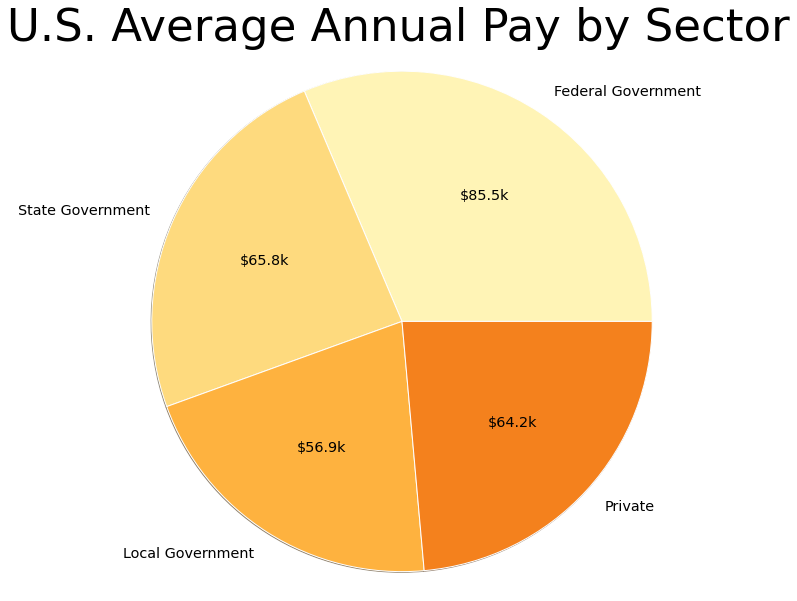

In [7]:
x3 = "Annual Total Wages"
x2 = "Annual Average Employment"
x1 = "Annual Average Pay"
y = "Ownership"


plot_df = nation_df

size =7
scale=1.5
wedge = size
colors = sns.color_palette('YlOrBr')[0:len(plot_df[x1])]
fig1, ax1 = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

total = plot_df[x1].sum()

ax1.pie(plot_df[x1],
        labels=plot_df[y], 
        autopct = lambda p: '${:.01f}k'.format(p * total / 100000),
        shadow=True,
        colors=colors,
        radius=size,
        wedgeprops=dict(edgecolor='w'),
        textprops = {'size': 'x-large'},
        startangle=0,)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("U.S. Average Annual Pay by Sector",fontsize=fontsize*1.5)
#plt.legend()
plt.show()

In [8]:
state_df

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
18,01000,01,0.0,0,10,2020,A,State,Alabama,Alabama -- Statewide,Total Covered,"10 Total, all industries",NaN,132001,1910169,99619444620,1003,52152,1.00,1.00
19,01000,01,0.0,1,10,2020,A,State,Alabama,Alabama -- Statewide,Federal Government,"10 Total, all industries",NaN,1250,55888,4820416591,1659,86252,1.39,1.72
20,01000,01,0.0,2,10,2020,A,State,Alabama,Alabama -- Statewide,State Government,"10 Total, all industries",NaN,1365,97435,5625429688,1110,57735,1.55,1.67
21,01000,01,0.0,3,10,2020,A,State,Alabama,Alabama -- Statewide,Local Government,"10 Total, all industries",NaN,3702,208839,9631021976,887,46117,1.11,1.11
22,01000,01,0.0,5,10,2020,A,State,Alabama,Alabama -- Statewide,Private,"10 Total, all industries",NaN,125684,1548007,79542576365,988,51384,0.96,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55731,56000,56,0.0,5,1024,2020,A,State,Wyoming,Wyoming -- Statewide,Private,1024 Professional and business services,NaN,4991,18354,1105052453,1158,60209,0.48,0.43
55732,56000,56,0.0,5,1025,2020,A,State,Wyoming,Wyoming -- Statewide,Private,1025 Education and health services,NaN,3486,26932,1248088204,891,46342,0.64,0.68
55733,56000,56,0.0,5,1026,2020,A,State,Wyoming,Wyoming -- Statewide,Private,1026 Leisure and hospitality,NaN,2421,32269,743850729,443,23051,1.34,1.50
55734,56000,56,0.0,5,1027,2020,A,State,Wyoming,Wyoming -- Statewide,Private,1027 Other services,NaN,1667,6764,272455135,775,40283,0.91,1.05


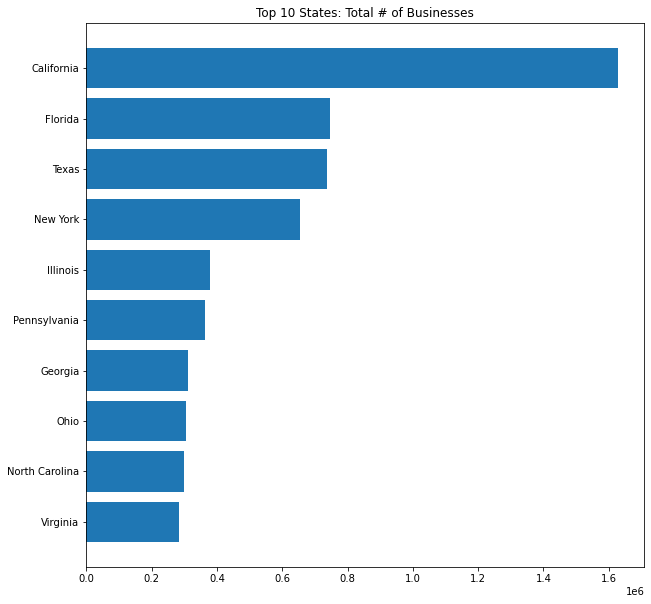

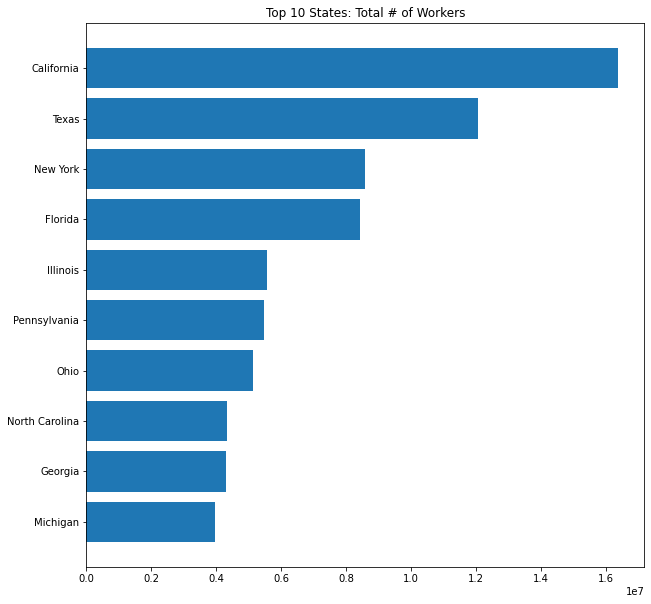

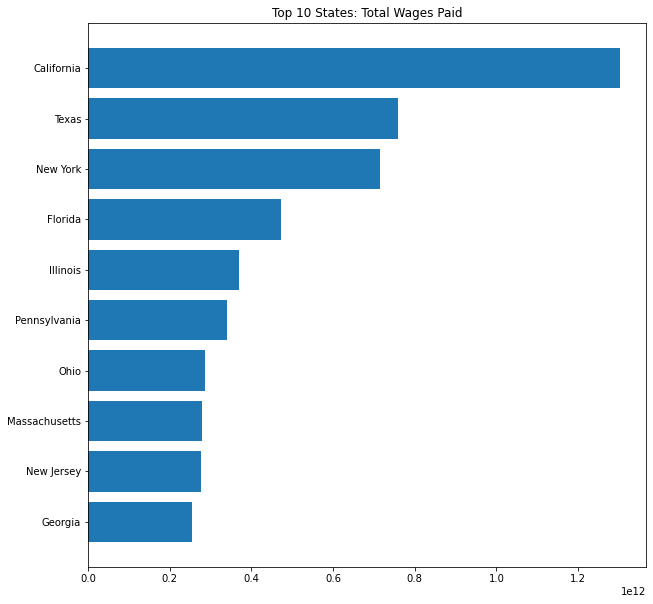

In [9]:
x3 = "Annual Total Wages"
x2 = "Annual Average Employment"
x1 = "Annual Average Pay"
x4 = "Annual Average Establishment Count"
y = "St Name"
state_df = raw_df[ (raw_df['Area Type'] == "State") & (raw_df["Ownership"] == "Total Covered")]


x_col= x4
plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10]

plot_df = plot_df.sort_values(x_col,ascending=True)

fig1, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

ax.barh(plot_df[y],plot_df[x_col])

plt.title("Top 10 States: Total # of Businesses")
plt.show()




x_col= x2

plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10]



plot_df = plot_df.sort_values(x_col,ascending=True)

fig1, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

ax.barh(plot_df[y],plot_df[x_col])


plt.title("Top 10 States: Total # of Workers")
plt.show()

x_col= x3

plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10]



plot_df = plot_df.sort_values(x_col,ascending=True)

fig1, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

ax.barh(plot_df[y],plot_df[x_col])


plt.title("Top 10 States: Total Wages Paid")
plt.show()

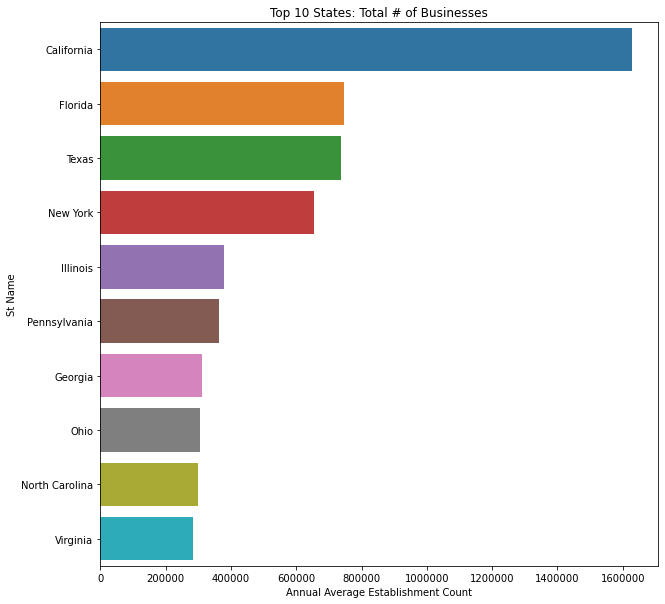

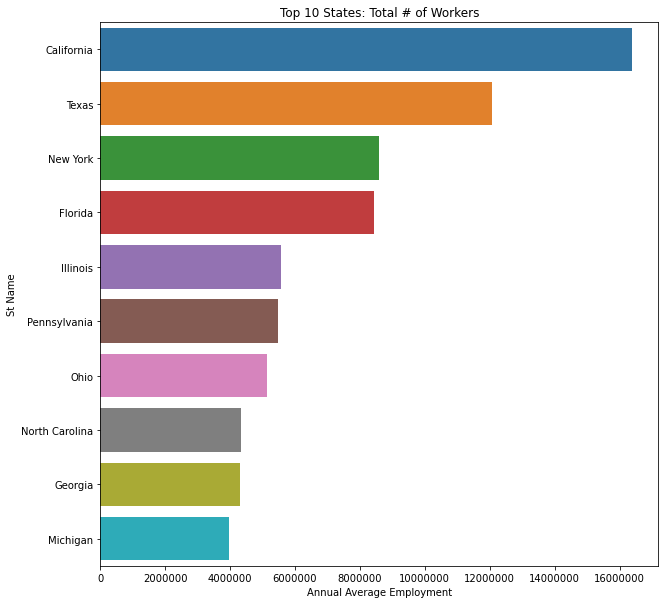

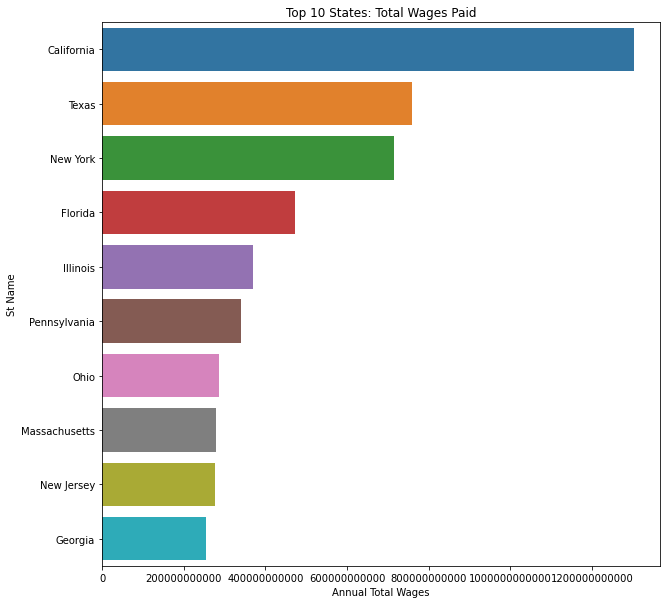

In [10]:
x3 = "Annual Total Wages"
x2 = "Annual Average Employment"
x1 = "Annual Average Pay"
x4 = "Annual Average Establishment Count"
y = "St Name"
state_df = raw_df[ (raw_df['Area Type'] == "State") & (raw_df["Ownership"] == "Total Covered")]


x_col= x4
plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10][[y,x_col]]

f, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

sns.barplot(data = plot_df, x=x_col,y=y)
ax.ticklabel_format(style='plain', axis="x")
plt.title("Top 10 States: Total # of Businesses")
plt.show()

x_col= x2

plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10][[y,x_col]]



fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

sns.barplot(data = plot_df, x=x_col,y=y)

ax.ticklabel_format(style='plain', axis="x")

plt.title("Top 10 States: Total # of Workers")
plt.show()


x_col= x3

plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10]



fig1, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

sns.barplot(data = plot_df, x=x_col,y=y)

ax.ticklabel_format(style='plain', axis="x")

plt.title("Top 10 States: Total Wages Paid")
plt.show()


In [11]:
#//*** Build Color Palette for Industries
#//*** Generates uniform colors by industry

palette = ["#8a7c32","#7449d0","#599f36","#cd4dc6","#408f65","#ba5086","#c7622f","#6786cf","#bd474f","#704995"]
palette = ["#602db9","#68ba3e","#c24ed6","#5eb280","#6863e0","#cf9133","#5c3486","#a1a24a","#cf4aa4","#49602e","#857bd1","#d34b31","#4ea6b0","#ce4669","#7a9ed5","#783d28","#47517e","#ce8a6f","#773158","#cc89b4"]
color_dict = {}

pc = 0

for x in  raw_df[raw_df["Industry"]!="10 Total, all industries"]["Industry"].unique():
    color_dict[x] = palette[pc]
    pc+=1

['Wyoming', 'Wisconsin', 'West Virginia', 'Washington', 'Virginia', 'Vermont', 'Utah', 'Texas', 'Tennessee', 'South Dakota', 'South Carolina', 'Rhode Island', 'Pennsylvania', 'Oregon', 'Oklahoma', 'Ohio', 'North Dakota', 'North Carolina', 'New York', 'New Mexico', 'New Jersey', 'New Hampshire', 'Nevada', 'Nebraska', 'Montana', 'Missouri', 'Mississippi', 'Minnesota', 'Michigan', 'Massachusetts', 'Maryland', 'Maine', 'Louisiana', 'Kentucky', 'Kansas', 'Iowa', 'Indiana', 'Illinois', 'Idaho', 'Hawaii', 'Georgia', 'Florida', 'District of Columbia', 'Delaware', 'Connecticut', 'Colorado', 'California', 'Arkansas', 'Arizona', 'Alaska', 'Alabama']


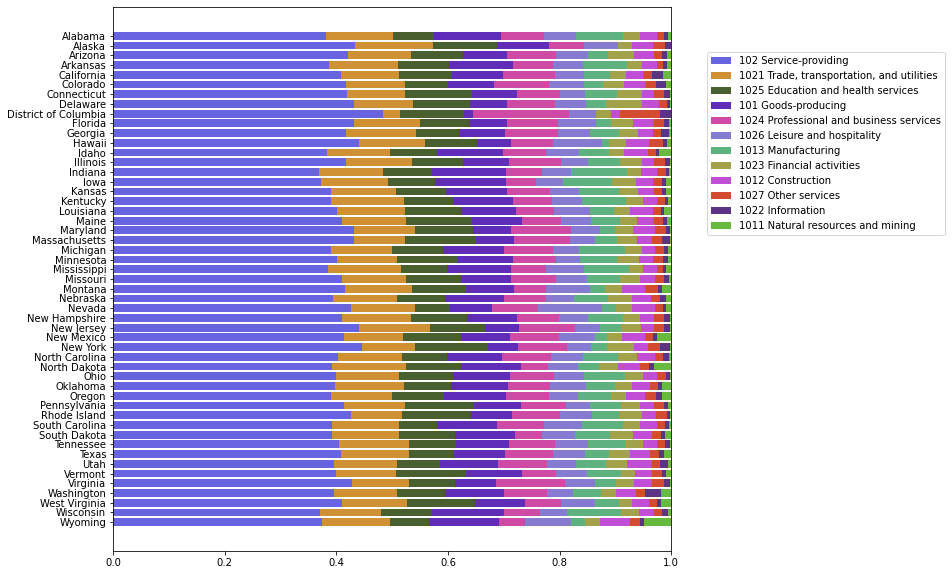

In [21]:
#raw_df[ (raw_df['Area Type']=='Nation') & (raw_df["Industry"]=="10 Total, all industries") ] 

plot_col = "Annual Average Employment"

state_df = raw_df[ (raw_df['Area Type']=='State') & (raw_df['Ownership'] == "Private")] 



industry_df = pd.DataFrame()
industry = []
total = []
for group in raw_df[raw_df["Industry"]!="10 Total, all industries"].groupby("Industry"):
    total.append(group[1][plot_col].sum())
    industry.append(group[0])

industry_df["industry"] = industry
industry_df["total"] = total
industries = industry_df.sort_values("total",ascending=False)["industry"].values[:-1]
#df.reindex(new_index)

#industries = raw_df[raw_df["Industry"]!="10 Total, all industries"]["Industry"].unique()

#industries = sorted_industries
    



#//*** Build ordered columns 
ordered_df = raw_df[ (raw_df['Area Type']=='State') & (raw_df['Ownership'] == "Private") & (raw_df["Industry"]=="10 Total, all industries")] 

ordered_cols = list(ordered_df.sort_values(plot_col,ascending=False)['St Name'])
fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

index  = 0
first = True

#//*** Reverse the state order because the Bar Graph draws bottom to top
for state in list(ordered_df["St Name"].unique()[::-1]):
    
    #//*** Get the Maximum Value for 100% Chart
    
    loop_df = state_df[(state_df['St Name'] == state) & (state_df['Industry'] != "10 Total, all industries")][["Industry",plot_col]]
    loop_df = loop_df.set_index(loop_df['Industry'])
    loop_df = loop_df.reindex(industries)
    max_val = loop_df[plot_col].sum()
    loop_df['percent'] = loop_df[plot_col]/max_val

    #//*** Left is a running sum, indicating where to draw the next element
    left=0
    for row in loop_df.iterrows():
        #//***Only add Labels the first time through
        if first:
            ax.barh(state,row[1]["percent"],label=row[1]["Industry"],color=color_dict[row[1]["Industry"]],left=left)

        else:
            ax.barh(state,row[1]["percent"],color=color_dict[row[1]["Industry"]],left=left)
            
        left += row[1]["percent"]
    first=False

#handles,labels = deduplicate_legend(ax)
plt.legend(loc='right',bbox_to_anchor=(1.5, .75))    
plt.show()

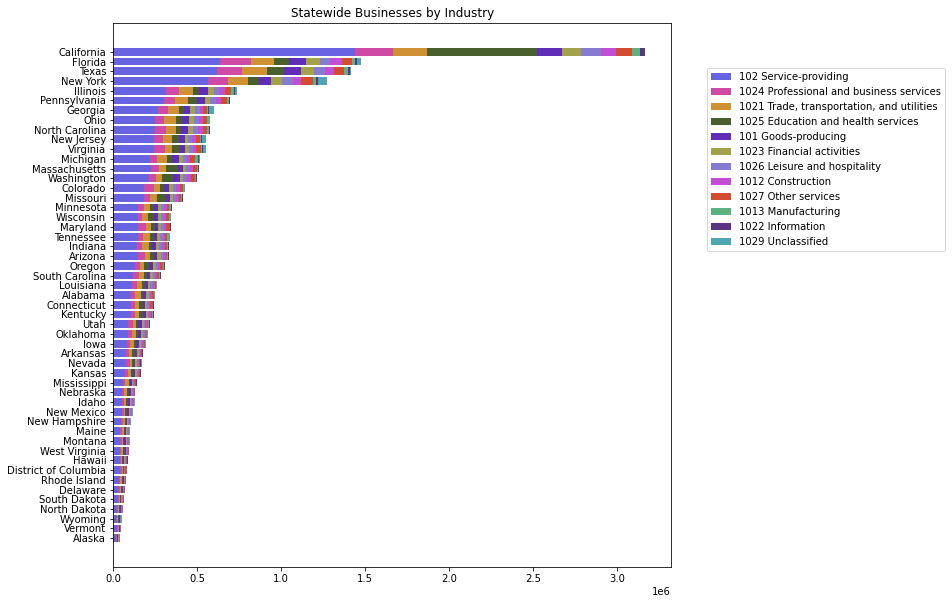

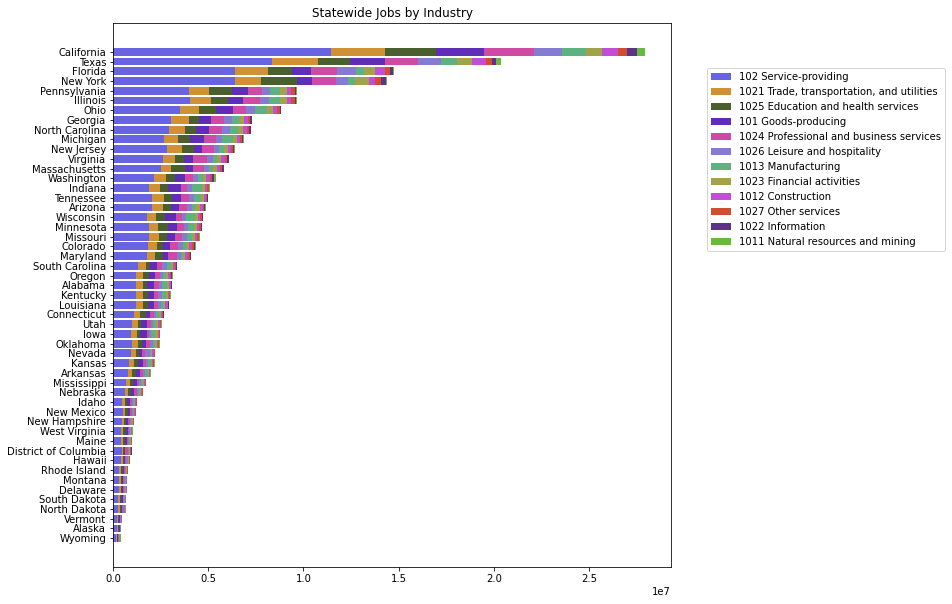

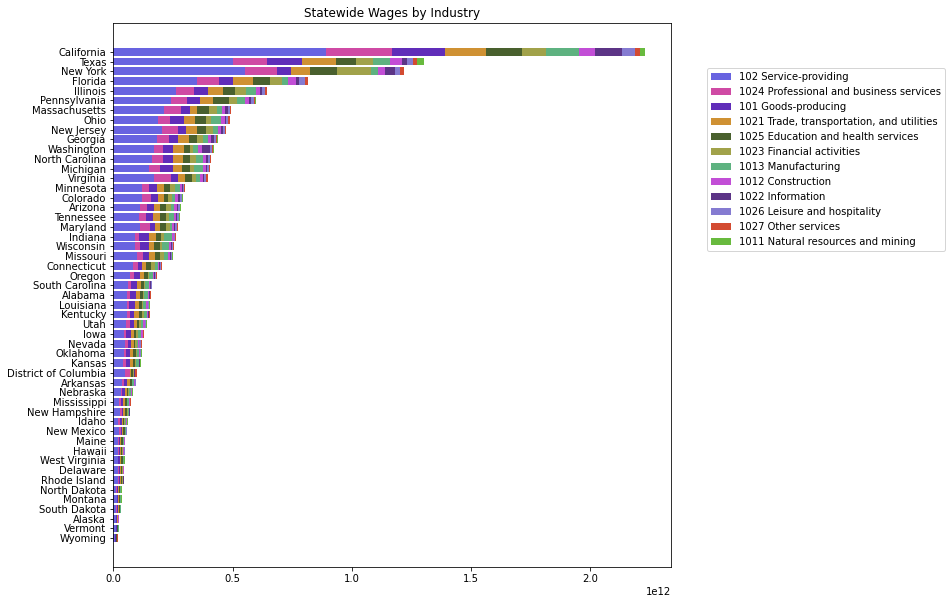

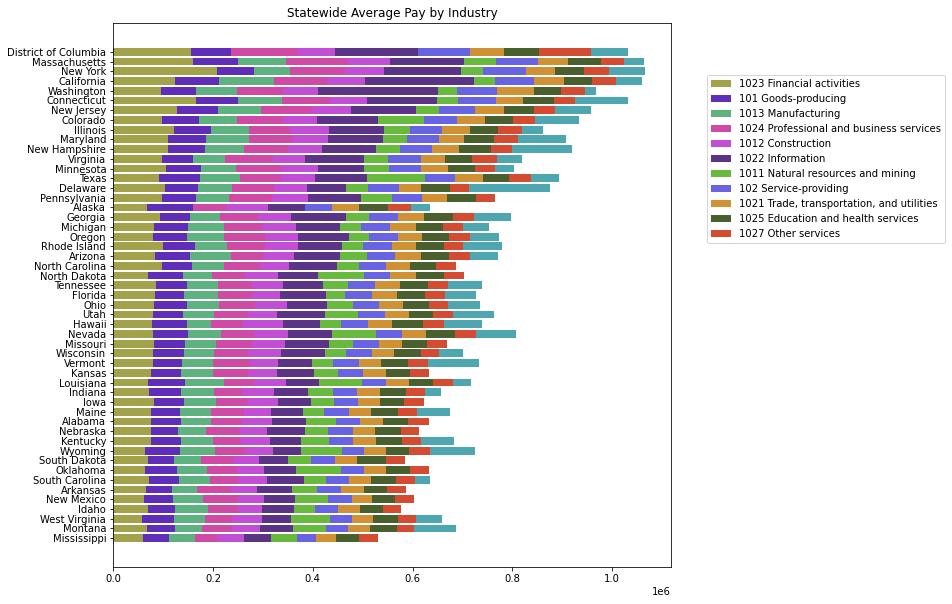

In [68]:
#//*** Generate a sorted list 
def build_sorted_industry(input_df,plot_col):
    
    industry_df = pd.DataFrame()
    industry = []
    total = []
    for group in input_df[input_df["Industry"]!="10 Total, all industries"].groupby("Industry"):
        total.append(group[1][plot_col].sum())
        industry.append(group[0])

    industry_df["industry"] = industry
    industry_df["total"] = total
    industries = industry_df.sort_values("total",ascending=False)["industry"].values[:-1]
    
    return industries

#//*** Build Stacked, stacked 100%, Vertical or Horizontal Bar

def build_stacked_bar(input_df, plot_col, industries, full=False, hbar=False):

    #//*** Build ordered columns 
    ordered_df = input_df[ (input_df['Area Type']=='State') & (input_df['Ownership'] == "Private") & (input_df["Industry"]=="10 Total, all industries")] 
    
    if full:
        if hbar:
            ordered_cols = list(ordered_df["St Name"].unique()[::-1])
        else:
            ordered_cols = list(ordered_df["St Name"].unique())
        
    else:
        if hbar:
            ordered_cols = list(ordered_df.sort_values(plot_col,ascending=False)['St Name'])[::-1]
        else:
            ordered_cols = list(ordered_df.sort_values(plot_col,ascending=False)['St Name'])
    
    fig, ax = plt.subplots()

    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    index  = 0
    first = True

    #//*** Reverse the state order because the Bar Graph draws bottom to top
    for state in ordered_cols:

        #//*** Get the Maximum Value for 100% Chart

        loop_df = state_df[(state_df['St Name'] == state) & (state_df['Industry'] != "10 Total, all industries")][["Industry",plot_col]]
        loop_df = loop_df.set_index(loop_df['Industry'])
        loop_df = loop_df.reindex(industries)
        max_val = loop_df[plot_col].sum()
        if full:
            loop_df['graph'] = loop_df[plot_col]/max_val
        else:
            
            loop_df['graph'] = loop_df[plot_col]
            

        #//*** Left is a running sum, indicating where to draw the next element
        offset=0
        for row in loop_df.iterrows():
            #//***Only add Labels the first time through
            try:
                if first:
                    if hbar:
                        ax.barh(state,row[1]["graph"],label=row[1]["Industry"],color=color_dict[row[1]["Industry"]],left=offset)
                    else:
                        ax.bar(state,row[1]["graph"],label=row[1]["Industry"],color=color_dict[row[1]["Industry"]],bottom=offset)

                else:
                    if hbar:
                        ax.barh(state,row[1]["graph"],color=color_dict[row[1]["Industry"]],left=offset)
                    else:
                        ax.bar(state,row[1]["graph"],color=color_dict[row[1]["Industry"]],bottom=offset)
            except:
                #//*** Skip any value that generates a NaN
                continue
                
            offset += row[1]["graph"]
        first=False
    
    
    return plt,fig,ax

plotting = {
    "Annual Average Establishment Count" : {
        "title" : "Statewide Businesses by Industry"
    },
    "Annual Average Employment" : {
        "title" : "Statewide Jobs by Industry"
        
    },
    "Annual Total Wages" : {
        "title" : "Statewide Wages by Industry"
        
    },
    "Annual Average Pay" : {
        "title" : "Statewide Average Pay by Industry"
        
    },
}

for plot_col in plotting.keys():

    industries = build_sorted_industry(raw_df,plot_col)

    plt, fig, ax  = build_stacked_bar(raw_df,plot_col, industries, False, True)

    plt.title(plotting[plot_col]["title"])
    plt.legend(loc='right',bbox_to_anchor=(1.5, .75))    
    plt.show()



In [ ]:
temp_df = raw_df[(raw_df['Ownership']=='Total Covered') & (raw_df['Area Type']=='State')].sort_values("Annual Average Pay",ascending = False)

temp_df = temp_df[["St Name","Annual Average Pay"]]

temp_df

In [ ]:
# //*** CODE HERE